In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#1
weather_dataframe = pd.DataFrame(pd.read_csv('weather1.csv', 
                                             sep=';', 
                                             usecols=["Местное время в Перми", "T", "Po", "U", "Ff", "N", "H", "VV"]))

weather_dataframe.info()

weather_dataframe['Местное время в Перми'] = pd.to_datetime(weather_dataframe['Местное время в Перми'])
weather_dataframe['N'] = weather_dataframe['N'].str.replace('%','', regex=False)

for column in ['T', 'Po', 'U', 'Ff', 'N','VV']:
        weather_dataframe[column] = pd.to_numeric(weather_dataframe[column], errors='coerce')

weather_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Местное время в Перми  2919 non-null   object 
 1   T                      2919 non-null   float64
 2   Po                     2917 non-null   float64
 3   U                      2919 non-null   int64  
 4   Ff                     2919 non-null   int64  
 5   N                      2916 non-null   object 
 6   H                      2551 non-null   object 
 7   VV                     2917 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 182.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Местное время в Перми  2919 non-null   datetime64[ns]
 1   T                     

C:\Users\user20\AppData\Local\Temp\ipykernel_10384\2424009955.py:8: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  weather_dataframe['Местное время в Перми'] = pd.to_datetime(weather_dataframe['Местное время в Перми'])


<function matplotlib.pyplot.show(close=None, block=None)>

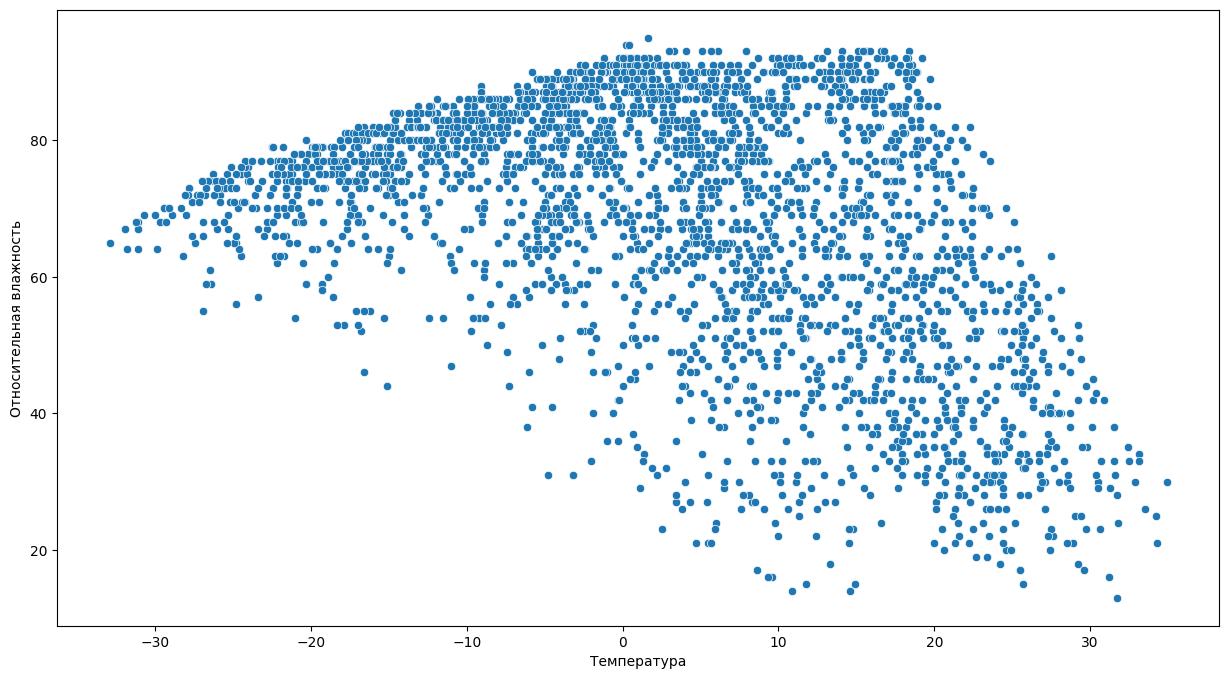

In [ ]:
#2
plt.figure(figsize=(15,8))
sns.scatterplot(
    x='T', y='U',
    data=weather_dataframe)
plt.xlabel('Температура')
plt.ylabel('Относительная влажность')
plt.show()

0       100.0
1       100.0
2         NaN
3       100.0
4       100.0
        ...  
2914    100.0
2915    100.0
2916    100.0
2917    100.0
2918    100.0
Name: N, Length: 2919, dtype: float64
0       100.0
1       100.0
2         NaN
3       100.0
4       100.0
        ...  
2914    100.0
2915    100.0
2916    100.0
2917    100.0
2918    100.0
Name: N, Length: 2919, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

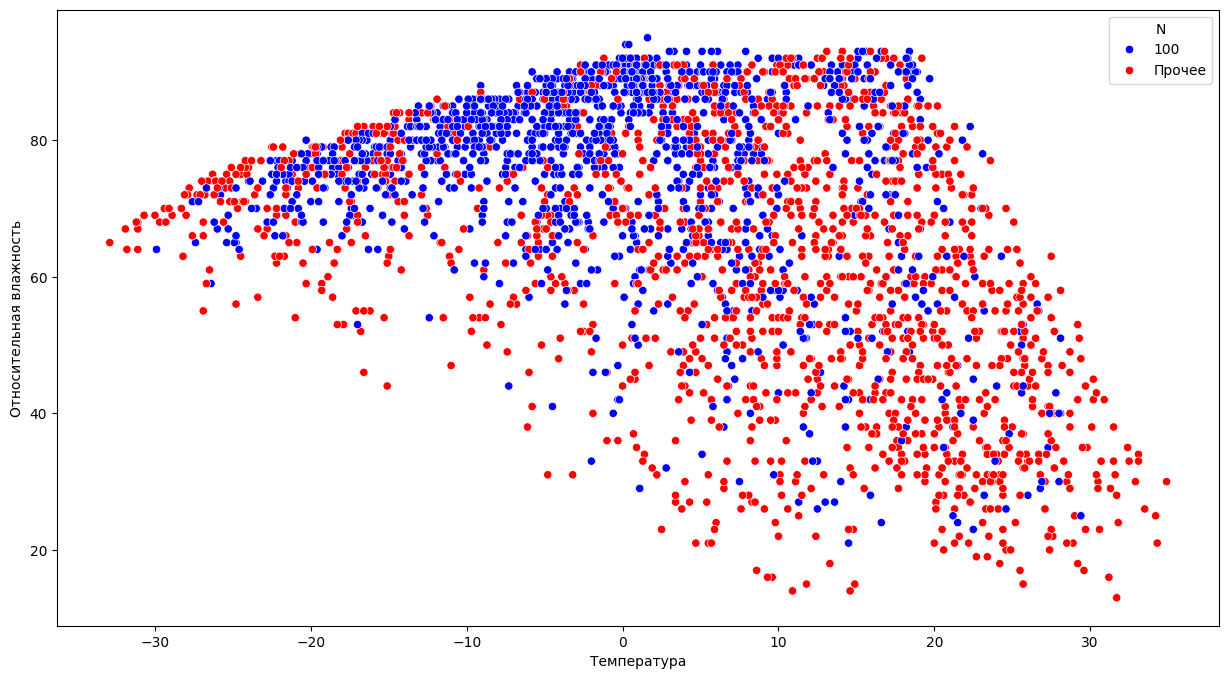

In [4]:
#3
cloudness_col = weather_dataframe['N']
print(weather_dataframe['N'])
print(cloudness_col)
weather_dataframe['N'] = np.where(weather_dataframe['N'] == 100, '100', 'Прочее')
plt.figure(figsize=(15,8))
sns.scatterplot(
    x='T', y='U',
    data=weather_dataframe,
    hue='N',
    palette={"100":'Blue',
             'Прочее': 'Red'})
plt.xlabel('Температура')
plt.ylabel('Относительная влажность')
plt.show    

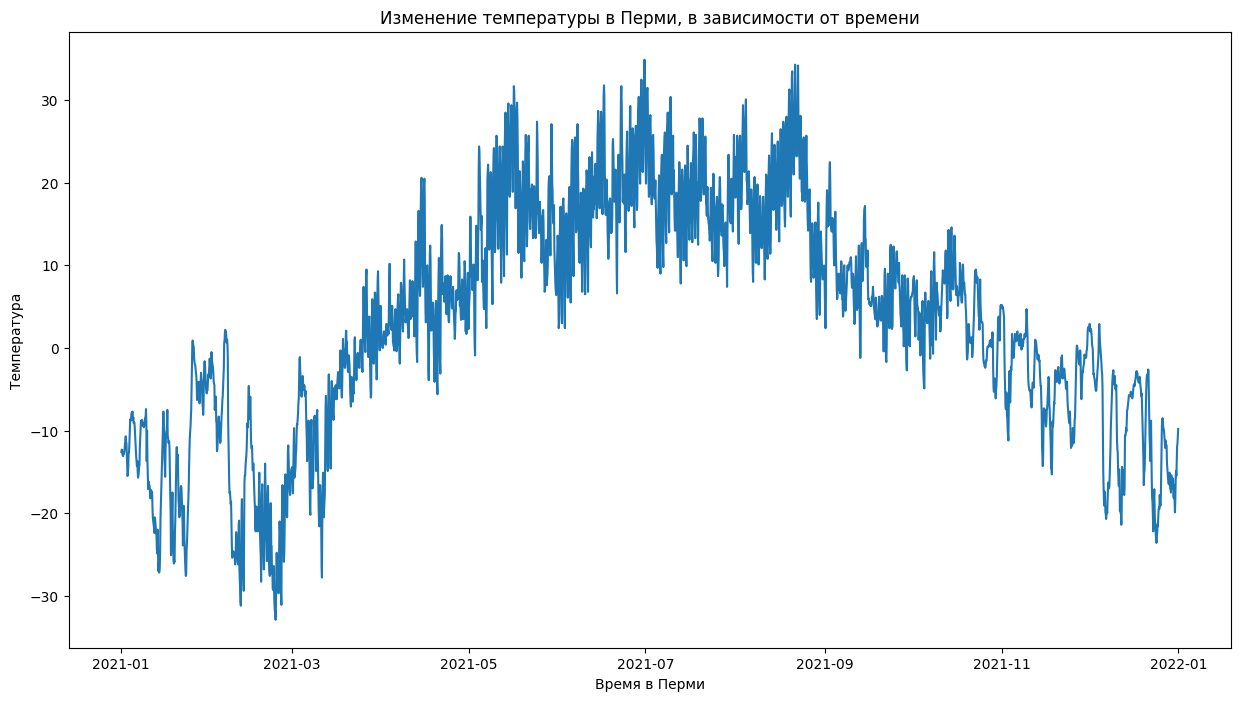

In [5]:
#4
plt.figure(figsize=(15,8))
plt.plot(weather_dataframe['Местное время в Перми'], weather_dataframe['T'])
plt.title('Изменение температуры в Перми, в зависимости от времени')
plt.xlabel('Время в Перми')
plt.ylabel('Температура')
plt.show()

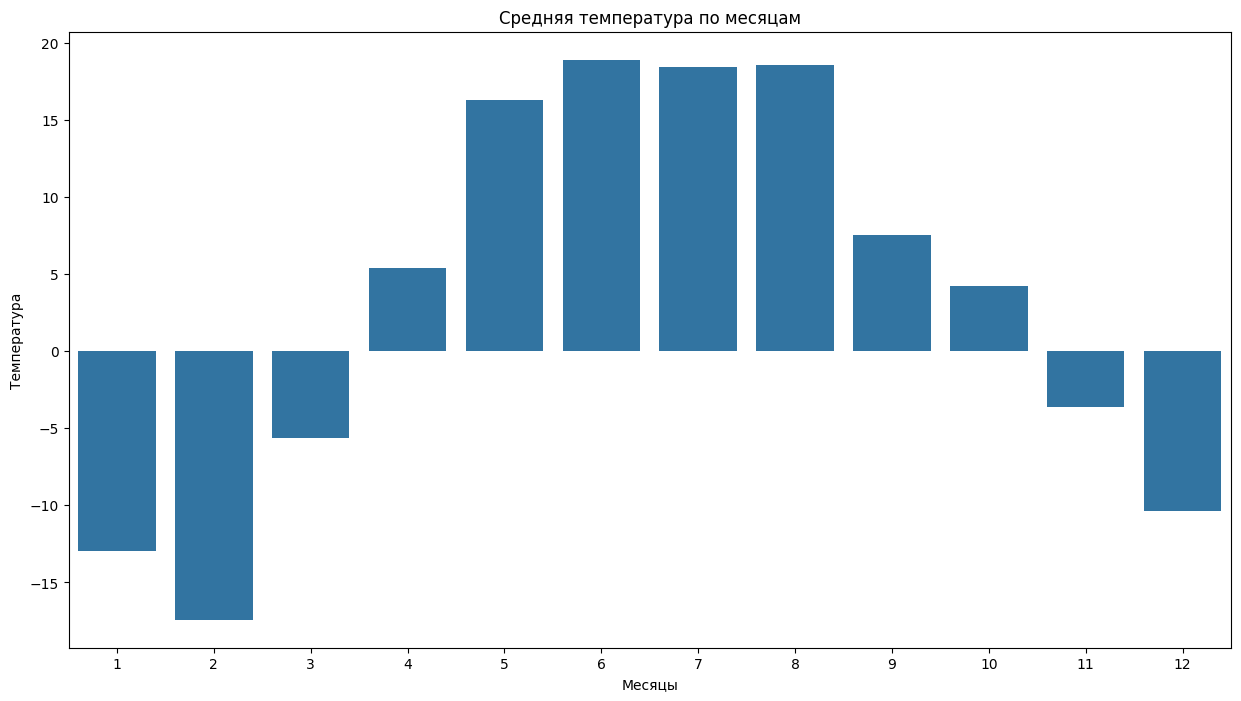

In [6]:
#5
weather_dataframe['month'] = weather_dataframe['Местное время в Перми'].dt.month

average_month_temperature = weather_dataframe.groupby('month')['T'].mean().reset_index()

plt.figure(figsize=(15,8))
sns.barplot(x='month', y='T', 
            data=average_month_temperature)
plt.title("Средняя температура по месяцам")
plt.ylabel("Температура")
plt.xlabel("Месяцы")
plt.show()

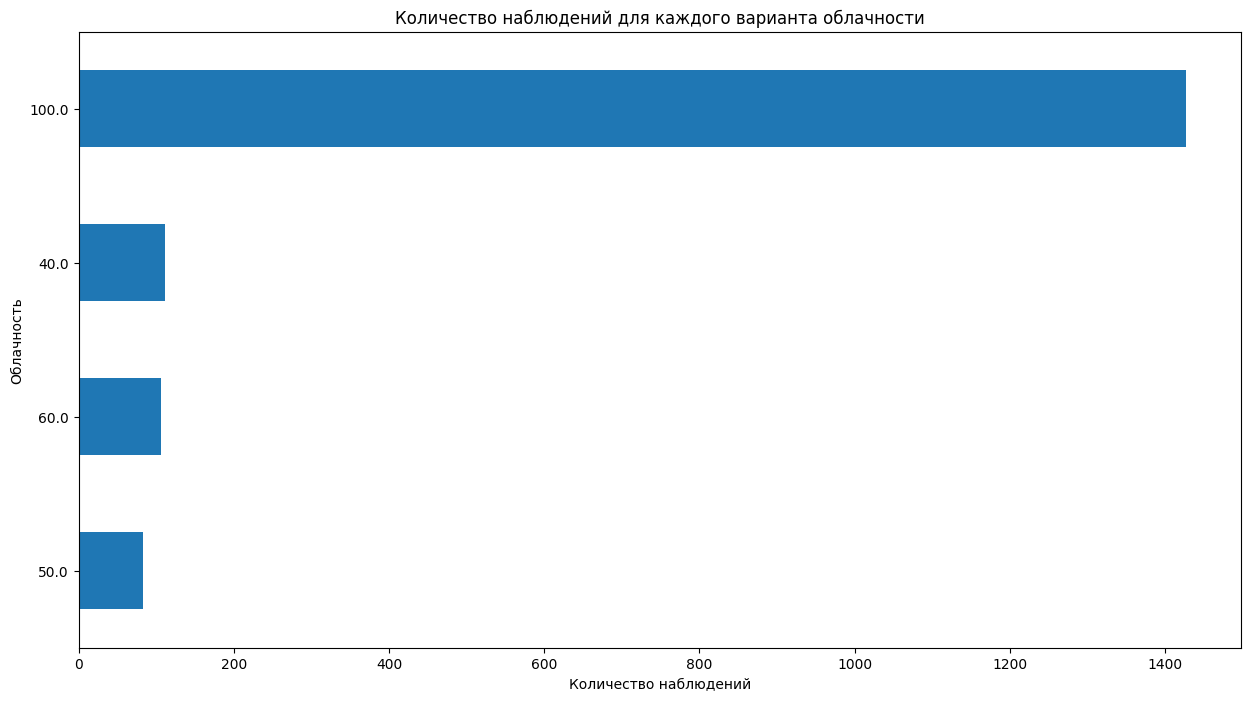

In [7]:
#6
cloudiness_counts = cloudness_col.value_counts().sort_values()

plt.figure(figsize=(15,8))
cloudiness_counts.plot(kind='barh')
plt.title('Количество наблюдений для каждого варианта облачности')
plt.xlabel('Количество наблюдений')
plt.ylabel('Облачность')
plt.show()

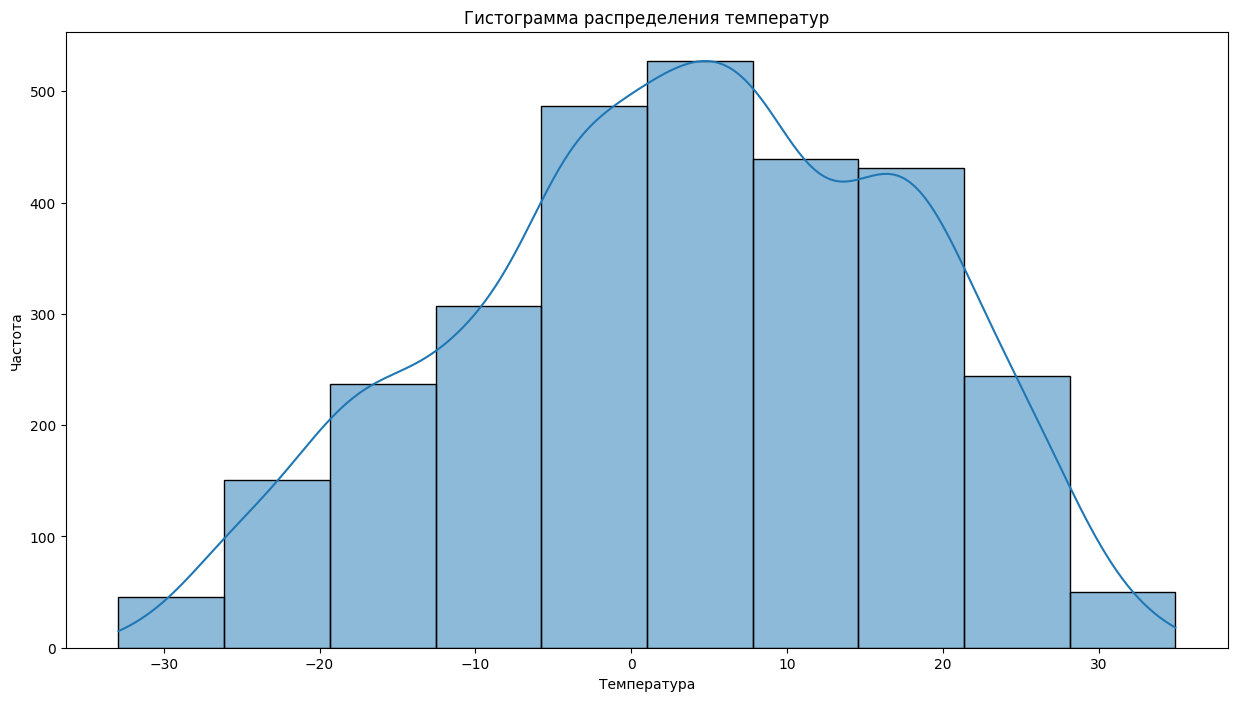

In [8]:
#7
plt.figure(figsize=(15,8))
sns.histplot(data=weather_dataframe, x='T', bins=10, kde=True)
plt.title('Гистограмма распределения температур')
plt.xlabel('Температура')
plt.ylabel('Частота')
plt.show()

Text(0, 0.5, 'Атмосферное давление, мм.рт.ст.')

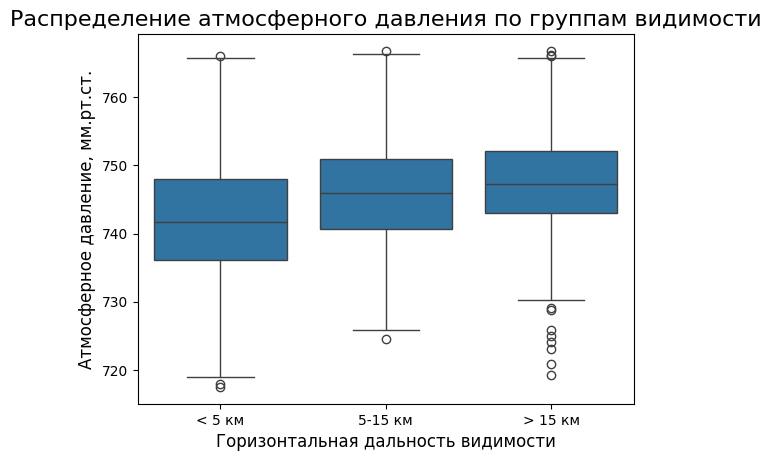

In [9]:
#8
bins = [-float('inf'), 5, 15, float('inf')]
labels = ['< 5 км', '5-15 км', '> 15 км']
weather_dataframe['VG'] = pd.cut(weather_dataframe['VV'], bins=bins, labels=labels, right=False)

sns.boxplot(data=weather_dataframe.dropna(subset=['VG']), 
            x='VG', y='Po')
plt.title('Распределение атмосферного давления по группам видимости', fontsize=16)
plt.xlabel('Горизонтальная дальность видимости', fontsize=12)
plt.ylabel('Атмосферное давление, мм.рт.ст.', fontsize=12)


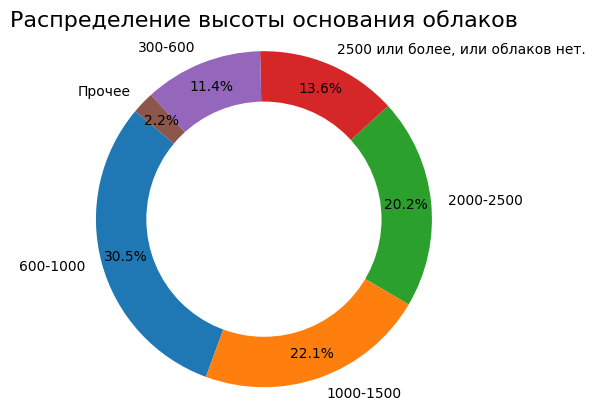

In [10]:
#9
height_counts = weather_dataframe['H'].value_counts()


if len(height_counts) > 5:
    top_5 = height_counts.nlargest(5)
    others = pd.Series({'Прочее': height_counts.iloc[5:].sum()})
    plot_data = pd.concat([top_5, others])
else:
    plot_data = height_counts


plt.pie(plot_data, labels=plot_data.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Распределение высоты основания облаков', fontsize=16)
plt.axis('equal')
plt.show()